# FORECASTING ON COCA COLA DATA

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
cocacola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cocacola.shape

(42, 2)

# DATA VISUALIZATION

## HISTOGRAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171D40EBBE0>]],
      dtype=object)

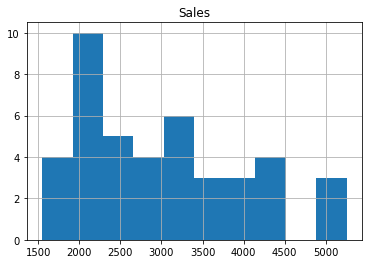

In [4]:
# create a histogram plot
cocacola.hist()

## DENSITY PLOT

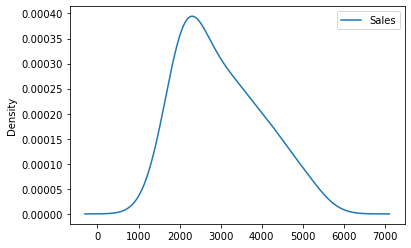

In [5]:
cocacola.plot(kind='kde')

## LINE PLOT

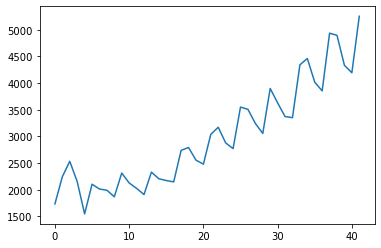

In [6]:
cocacola.Sales.plot()

## HEATMAP

In [7]:
cocacola['Quarters']= 0
cocacola['Year'] = 0
for i in range(42):
    p = cocacola["Quarter"][i]
    cocacola['Quarters'][i]= p[0:2]
    cocacola['Year'][i]= p[3:5]

<ipython-input-7-5a8792f18232>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Quarters'][i]= p[0:2]
C:\Users\smile\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-7-5a8792f18232>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['Year'][i]= p[3:5]


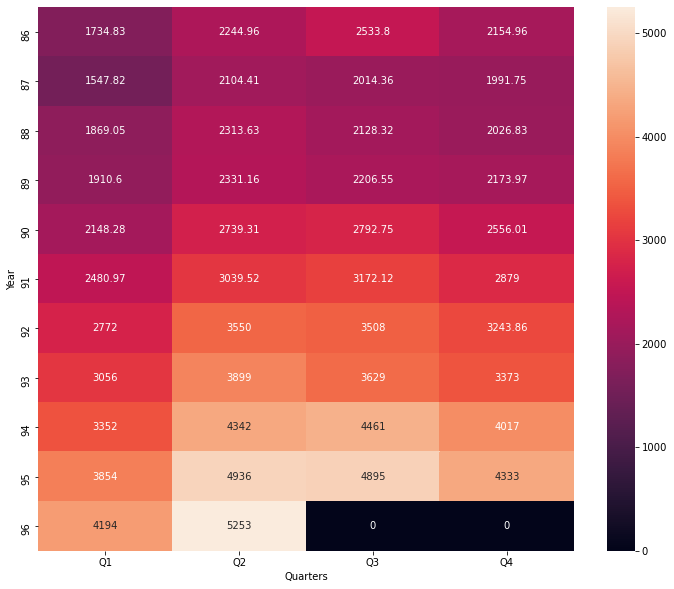

In [8]:
# visualize the data

plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data = cocacola,values="Sales",index="Year",columns="Quarters"
                             ,aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt = "g")

## LAG PLOT

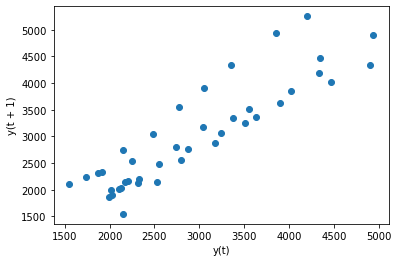

In [9]:
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
series=pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0,parse_dates=True)
lag_plot(series)
pyplot.show()

## AUTOCORRELATION PLOT

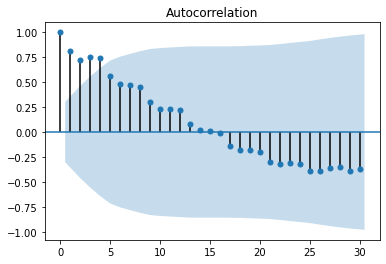

In [10]:
# create an autocorrelation plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series=pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0,parse_dates=True)
plot_acf(series,lags=30)
pyplot.show()

## Time - Series Decomposition Plot

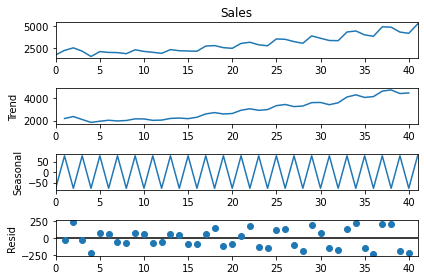

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_ts=seasonal_decompose(cocacola.Sales,period=2)
dec_ts.plot()
plt.show()

## Creating dummies for model based approach

In [12]:
dummy=pd.DataFrame(pd.get_dummies(cocacola['Quarters']))
data=pd.concat((cocacola,dummy),axis=1)

In [13]:
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [15]:
data["t"] = np.arange(1,43)

data["t_sq"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_sq,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [17]:
data.nunique()

Quarter      42
Sales        42
Quarters      4
Year         11
Q1            2
Q2            2
Q3            2
Q4            2
t            42
t_sq         42
log_sales    42
dtype: int64

# SPLIT THE DATA

In [18]:
Train = data.head(35)
Test = data.tail(7)

In [19]:
Train.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_sq,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


# Forecasting using model based methods

In [20]:
# Linear model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351143

In [22]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

493.34864848421216

In [23]:
#Quadratic 

Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

511.811731941731

In [24]:
# Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.8704164251726

In [27]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.46413951638107

In [29]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1938.9332351965963

In [30]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

339.1874666994937

In [31]:
#tabulating the rmse values

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,636.507293
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
3,rmse_add_sea,1861.870416
4,rmse_add_sea_quad,309.464140
5,rmse_Mult_sea,1938.933235
6,rmse_Mult_add_sea,339.187467


# DATA DRIVEN MODEL

In [33]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt

In [35]:
train=data.head(37)
test=data.tail(5)

# Moving Average

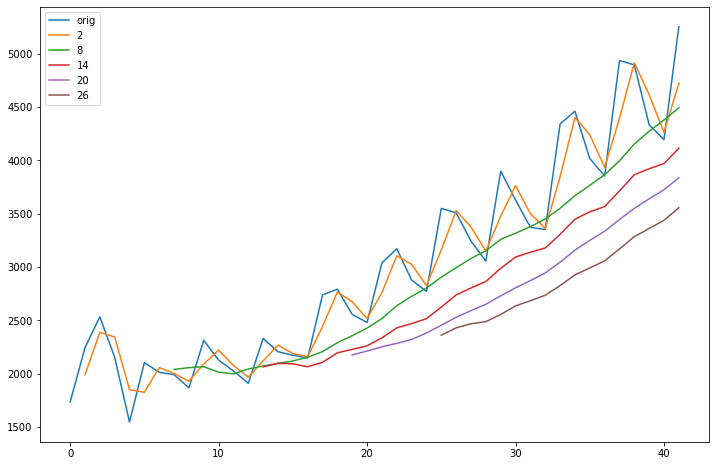

In [36]:
plt.figure(figsize=(12,8))
data.Sales.plot(label='orig')
for i in range(2,30,6):
    data.Sales.rolling(i).mean().plot(label=str(i))

plt.legend(loc='best')

# ACF & PACF Plots

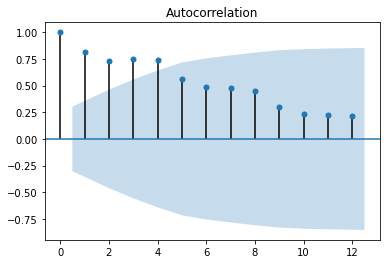

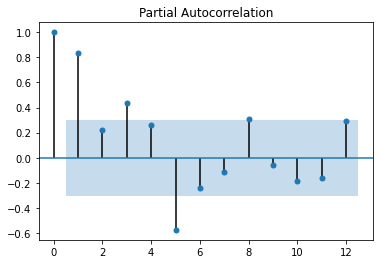

In [37]:
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(data.Sales,lags=12)
tsaplots.plot_pacf(data.Sales,lags=12)
plt.show()

# Evaluation Metric MAPE

In [38]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [40]:
import warnings
train['Sales']=train['Sales'].astype('float')
ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
pred_ses
MAPE_ses=MAPE(pred_ses,test.Sales)
MAPE_ses

<ipython-input-40-9466db52f36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sales']=train['Sales'].astype('float')


19.127275644531466

In [41]:
rmse_ses=sqrt(mean_squared_error(test['Sales'],pred_ses))
rmse_ses

1011.722780238199

# Holt method

In [43]:
hw_model=Holt(train.Sales).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE_hw=MAPE(pred_hw,test.Sales)
MAPE_hw

14.286063075340241

In [44]:
rmse_hw=sqrt(mean_squared_error(test.Sales,pred_hw))
rmse_hw

809.7113655201427

## Holt Winter Exponential Smoothing with additive Seasonality and additive Trend

In [45]:
hwe_add_sea_trend_model=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_hwe_add_sea_trend=hwe_add_sea_trend_model.predict(start=test.index[0],end=test.index[-1])
MAPE_hwe_add_sea=MAPE(pred_hwe_add_sea_trend,test.Sales)
MAPE_hwe_add_sea

C:\Users\smile\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


6.08625474898952

In [46]:
rmse_hwe_add_sea=sqrt(mean_squared_error(test.Sales,pred_hwe_add_sea_trend))
rmse_hwe_add_sea

366.1456958068542

## Holts Winter Exponential Smoothing with multiplicative seasonality and additive trend

In [47]:
hwe_mul_sea_trend_model=ExponentialSmoothing(train.Sales,seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hwe_mul_sea_trend=hwe_mul_sea_trend_model.predict(start=test.index[0],end=test.index[-1])
MAPE_hwe_mul_sea=MAPE(pred_hwe_mul_sea_trend,test.Sales)
MAPE_hwe_mul_sea

2.6765953029272964

In [48]:
rmse_hwe_mul_sea=sqrt(mean_squared_error(test.Sales,pred_hwe_mul_sea_trend))
rmse_hwe_mul_sea

145.2533451155332

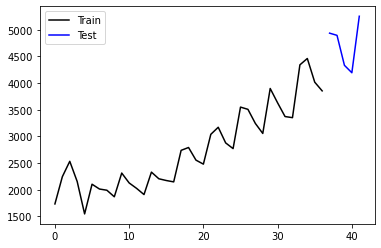

In [49]:
plt.plot(train.index,train["Sales"],label="Train",color="black") 
plt.plot(test.index,test["Sales"],label="Test",color="blue")
plt.legend()

In [50]:
Table={"Model":pd.Series(["MAPE_hw","MAPE_ses","MAPE_hwe_add_sea","MAPE_hwe_mul_sea"]),"MAPE_VALUES":pd.Series([MAPE_hw,MAPE_ses,MAPE_hwe_add_sea,MAPE_hwe_mul_sea])}
Table=pd.DataFrame(Table) 
Table.sort_values('MAPE_VALUES')

,Model,MAPE_VALUES
3,MAPE_hwe_mul_sea,2.676595
2,MAPE_hwe_add_sea,6.086255
0,MAPE_hw,14.286063
1,MAPE_ses,19.127276


In [51]:
table_rmse_data={'Model':pd.Series(['rmse_ses','rmse_hw','rmse_hwe_add_sea','rmse_hwe_mul_sea']),"RMSE_Values": pd.Series([rmse_ses,rmse_hw,rmse_hwe_add_sea,rmse_hwe_mul_sea])}
table_rmse_data=pd.DataFrame(table_rmse_data)
table_rmse_data.sort_values('RMSE_Values')

,Model,RMSE_Values
3,rmse_hwe_mul_sea,145.253345
2,rmse_hwe_add_sea,366.145696
1,rmse_hw,809.711366
0,rmse_ses,1011.722780


# Forecasting based on ARIMA Model

In [52]:
# separate out a validation dataset
split_point = len(data) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


## Persistence/ Base model

In [56]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [57]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
>Predicted=4017.000, Expected=3854.000
>Predicted=3854.000, Expected=4936.000
>Predicted=4936.000, Expected=4895.000
>Predicted=4895.000, Expected=4333.000
>Predicted=4333.000, Expected=4194.000
>Predicted=4194.000, Expected=5253.000
RMSE: 527.148


## ARIMA Hyperparameters

In [58]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

## Grid search for p,d,q values

In [59]:
# Grid search for p,d,q values
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [60]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=840.936
ARIMA(0, 0, 1) RMSE=617.895
ARIMA(0, 0, 2) RMSE=450.668
ARIMA(0, 1, 0) RMSE=389.741
ARIMA(0, 1, 1) RMSE=396.141
ARIMA(0, 1, 2) RMSE=354.965
ARIMA(0, 1, 3) RMSE=317.182
ARIMA(0, 1, 4) RMSE=272.859
ARIMA(0, 2, 0) RMSE=593.232
ARIMA(0, 2, 1) RMSE=414.868
ARIMA(0, 2, 2) RMSE=346.962
ARIMA(0, 2, 3) RMSE=351.889
ARIMA(1, 0, 0) RMSE=470.347
ARIMA(1, 1, 0) RMSE=387.221
ARIMA(1, 2, 0) RMSE=574.840
ARIMA(2, 0, 0) RMSE=493.073
ARIMA(2, 1, 0) RMSE=300.159
ARIMA(2, 2, 0) RMSE=485.192
ARIMA(3, 0, 0) RMSE=429.705
ARIMA(3, 1, 0) RMSE=245.267
ARIMA(3, 2, 0) RMSE=157.040
ARIMA(4, 0, 0) RMSE=390.107
ARIMA(4, 1, 0) RMSE=163.619
ARIMA(4, 2, 0) RMSE=161.048
Best ARIMA(3, 2, 0) RMSE=157.040


## Build model based on optimized values

In [70]:
model=ARIMA(X,order=(2,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(10)[0]
forecast

array([3627.71357744, 3829.98978723, 3740.394755  , 3718.0974282 ,
       3857.91565504, 3938.04690901, 3930.93489826, 3969.65960376,
       4053.61222325, 4105.09846452])

In [71]:
#Error on test data
val=pd.read_csv('validation.csv',header=None)
val

,0,1
0,Q1_94,3352.0
1,Q2_94,4342.0
2,Q3_94,4461.0
3,Q4_94,4017.0
4,Q1_95,3854.0
5,Q2_95,4936.0
6,Q3_95,4895.0
7,Q4_95,4333.0
8,Q1_96,4194.0
9,Q2_96,5253.0


In [72]:
rmse_val=sqrt(mean_squared_error(val[1],forecast))
rmse_val

658.9034248235473

## By above all method of models ARIMA model only gives best RMSE value.So we build final model using this model.

# Final Model by combining train and test - ARIMA Method

In [75]:
data_final=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,index_col=0,parse_dates=True)
X=data_final.Sales.values
X=X.astype('float32')

In [76]:
model_arima=ARIMA(X,order=(2,1,0)).fit()

In [77]:
forecast=model_arima.forecast(10)[0]
forecast

array([5224.09451616, 4632.09504276, 4929.63810623, 5399.63326071,
       5212.49808152, 5066.35218352, 5364.58880653, 5526.12637867,
       5413.7248898 , 5462.64126016])

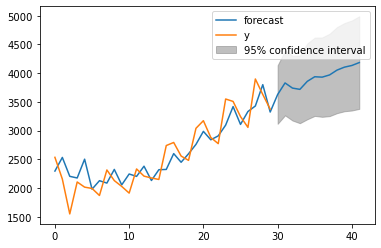

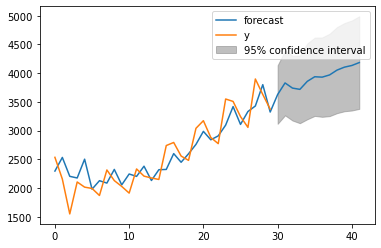

In [79]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,42)

## CONCLUSION:
## By performing both Model based approach and Data Driven approach for COCACOLA data,ARIMA only gives best RMSE=157.040,so we build the final model.We also created dummies column for Quarters in model based approach